Length of X and y: 400 400
Predicted values:
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
Confusion Matrix:
 [[55  3]
 [ 1 21]]
Accuracy of model: 0.95


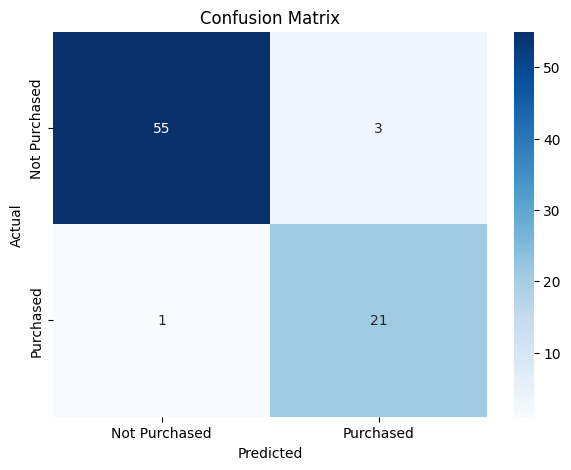

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

print("Length of X and y:", len(X), len(y))

le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Predicted values:\n", y_pred)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy of model:", ac)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Purchased', 'Purchased'], 
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()